In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

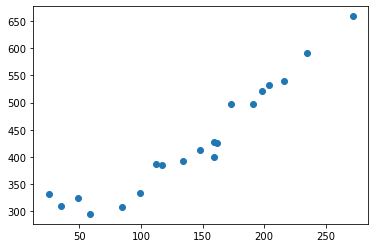

In [9]:
data=pd.read_csv('regression1.csv')
X= data.iloc[:,0].values
y = data.iloc[:,-1].values
plt.scatter(X, y)

# 標準化

In [10]:
from sklearn.preprocessing import StandardScaler

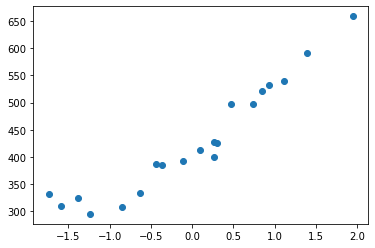

In [11]:
X1 = X.reshape(-1,1) #scikit-learn中，希望data儲存在⼆維陣列
X_std = StandardScaler().fit_transform(X1)
plt.scatter(X_std, y) 

In [12]:
data.corr() #相關係數

,X,y
X,1.000000,0.950392
y,0.950392,1.000000


# 線性規劃

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [16]:
lr=LinearRegression()
lr.fit(X_std,y)
y_pred = lr.predict(X_std)
print('Slope: %.3f' % lr.coef_[0]) #模型的斜率
print('Intercept: %.3f' % lr.intercept_) #模型的截距
print('MSE: %.3f' % mean_squared_error(y,y_pred)) #均方誤:可以評價資料的變化程度，值越小，說明預測模型描述實驗資料有更好的精確度。
print('R^2: %.3f' % r2_score(y,y_pred)) #判定係數:可代表解釋力

Slope: 95.564
Intercept: 428.600
MSE: 978.262
R^2: 0.903


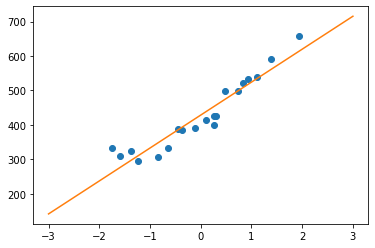

In [12]:
x = np.linspace(-3,3,100)
plt.plot(X_std,y,'o') #點
plt.plot(x,lr.intercept_+lr.coef_[0]*x) #線

# 多項式回歸

* degree值設定過大會導致overfitting(MSE:Test>Train；R Square:Test<Train)

In [5]:
from sklearn.preprocessing import PolynomialFeatures

In [15]:
pr=LinearRegression()
quadratic=PolynomialFeatures(degree=2) #新增一個二次項(添加特徵)
X_quad=quadratic.fit_transform(X_std)
pr.fit(X_quad,y)
y_quad_pred = pr.predict(X_quad)
print('theta1: %.3f' % pr.coef_[0]) 
print('theta2: %.3f' % pr.coef_[1]) 
print('Intercept: %.3f' % pr.intercept_) 

theta1: 0.000
theta2: 97.133
Intercept: 405.977


# 實作:糖尿病資料集

In [18]:
from sklearn.datasets import load_diabetes
data=load_diabetes()
data.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

## 分割數據集

In [24]:
from sklearn.model_selection import train_test_split

In [37]:
x=load_diabetes().data 
y=load_diabetes().target
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=8) #控制隨機狀態

In [28]:
lr = LinearRegression()
lr.fit(x_train,y_train)
print(lr.coef_) #迴歸係數:越大代表對y影響力越大，負值代表負相關
y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)
print('MSE train:%.3f, test:%.3f'%(mean_squared_error(y_train,y_train_pred),
                                   mean_squared_error(y_test,y_test_pred)))
print('R^2 train:%.3f, test:%.3f'%(r2_score(y_train,y_train_pred),
                                   r2_score(y_test,y_test_pred)))

[   11.5106203   -282.51347161   534.20455671   401.73142674
 -1043.89718398   634.92464089   186.43262636   204.93373199
   762.47149733    91.9460394 ]
MSE train:2812.369, test:3108.041
R^2 train:0.530, test:0.459


## 共線性

* 迴歸模型中存在著重複的自變數，提高某一自變數的解釋力與預測力。

### 處理方法

* 資料預處理(轉換、只留下不相關的變數)、脊回歸、主成分分析

# 脊回歸(L2正則化)

* 透過調整參數alpha控制損失函數

* 縮小迴歸係數會使得模型相對穩定

In [29]:
from sklearn.linear_model import Ridge

In [31]:
ridge = Ridge(alpha=1).fit(x_train,y_train)
print(ridge.coef_)
y_train_pred = ridge.predict(x_train)
print('MSE train:%.3f, test:%.3f'%(mean_squared_error(y_train,y_train_pred),
                                   mean_squared_error(y_test,y_test_pred)))
print('R^2 train:%.3f, test:%.3f'%(r2_score(y_train,y_train_pred),
                                   r2_score(y_test,y_test_pred)))

[  36.8262072   -75.80823733  282.42652716  207.39314972   -1.46580263
  -27.81750835 -134.3740951    98.97724793  222.67543268  117.97255343]
MSE train:3397.720, test:3108.041
R^2 train:0.433, test:0.459


# LASSO回歸(L1正則化)

* 透過調整參數alpha控制損失函數

* 縮小迴歸係數有助於降低模型複雜度和多重共線性

In [32]:
from sklearn.linear_model import Lasso

In [34]:
lasso = Lasso(alpha=1).fit(x_train,y_train)
print(lasso.coef_)
y_train_pred = lasso.predict(x_train)
print('MSE train:%.3f, test:%.3f'%(mean_squared_error(y_train,y_train_pred),
                                   mean_squared_error(y_test,y_test_pred)))
print('R^2 train:%.3f, test:%.3f'%(r2_score(y_train,y_train_pred),
                                   r2_score(y_test,y_test_pred)))

[  0.          -0.         384.73421807  72.69325545   0.
   0.          -0.           0.         247.88881314   0.        ]
MSE train:3818.201, test:3108.041
R^2 train:0.362, test:0.459


## Ridge v.s. LASSO

* Ridge通常是⾸選(因LASSO在移除變數的同時，會犧牲模型的正確性)

* 如果特徵太多，且只有⼀⼩部分是真正重要的，則應該選擇LASSO(解釋力較高)

* 如果須解釋模型，LASSO更好理解(因使⽤較少特徵)

# Elastic Net(結合上述兩者)

* 優點: 簡單、易於運算;迴歸係數能得到有⽤的訊息

* 缺點: 易受異常值影響、相關預測因⼦的權重會被扭曲、曲線趨勢、預測因⼦和結果並不暗⽰因果關係

In [35]:
from sklearn.linear_model import ElasticNet

In [39]:
elanet = ElasticNet(alpha=1,l1_ratio=0.5).fit(x_train,y_train) #l1_ratio = 1 即為 LASSO
print(elanet.coef_)
y_train_pred = elanet.predict(x_train)
print('MSE train:%.3f, test:%.3f'%(mean_squared_error(y_train,y_train_pred),
                                   mean_squared_error(y_test,y_test_pred)))
print('R^2 train:%.3f, test:%.3f'%(r2_score(y_train,y_train_pred),
                                   r2_score(y_test,y_test_pred)))

[ 0.21886047  0.          3.32172605  2.40903271  0.39329589  0.0813468
 -1.66664402  1.86756919  3.0113635   1.88112395]
MSE train:5937.607, test:3108.041
R^2 train:0.009, test:0.459
